In [1]:
import numpy as np
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
path1 = 'inelasticDarkMatter/nuevoScan/'

In [3]:
def calc_mchi2(mchi1, ma, gx, f):
    vphi = ma / (2*gx)
    return mchi1 + 2*f*vphi

def calc_lim_ms2(alphad, ma):
    return ma**2 / (4*np.sqrt(np.pi)* alphad)


def calc_values(df_dat):
    mx1 = df_dat.column('Mx1')
    yf = df_dat.column('yf')
    vphi = df_dat.column('MAp') / (2*df_dat.column('gX'))
    mx2 = mx1 + 2*yf*vphi
    df_dat['Mx2'] =  mx2
    df_dat['delta'] = df_dat.column('Mx2') - df_dat.column('Mx1')
    df_dat['alphad'] = (df_dat.column('gX')**2)/(4*np.pi)
    df_dat['alphaf'] = (df_dat.column('yf')**2)/(4*np.pi)
    #df_dat['ratio_ms2_map'] = df_dat.column('Ms2')**2 / calc_lim_ms2(df_dat.column('alphad'),df_dat.column('MAp'))
    df_dat['mass_relative'] = df_dat.column('delta') / df_dat.column('Mx1')
    return df_dat

def convertir_elementos(df_):
    # Crear una copia del DataFrame original
    df = df_.copy() 
        
    # Convertir y redondear las columnas numéricas
    df['Mchi1'] = df['Mchi1'] * 1e3 
    df['MAp'] = df['MAp'] * 1e3
    df['mphi'] = df['mphi'] * 1e3
    
    # Renombrar las columnas
    df = df.relabel('Mchi1', 'Mx1')
    df = df.relabel('Mchi2', 'Mx2')
    df = df.relabel('mphi', 'Ms2')
    df = df.relabel('ff', 'yf')
    df = df.relabel('angle', 'st')
    df = calc_values(df)
    return df 


def cargado_archivos(archivos):
    """
    Combina múltiples archivos CSV en una única tabla, manejando archivos vacíos o inexistentes.

    Args:
        archivos (list): Lista de rutas de archivos CSV.

    Returns:
        Table: Tabla combinada. Si no hay archivos válidos, retorna una tabla vacía.
    """
    datos = None  # Inicializamos como None para manejar el primer archivo válido

    for archivo in archivos:
        try:
            tabla_temp = Table.read_table(archivo)
            if tabla_temp.num_rows > 0:
                if datos is None:  # Primer archivo válido
                    datos = tabla_temp
                else:
                    datos.append(tabla_temp)  # Append a la tabla existente
        except FileNotFoundError:
            print(f"Error: {archivo} no existe.")
        except Exception as e:  # Otros errores (ej: formato incorrecto)
            print(f"Error al cargar {archivo}: {str(e)}")

    return Table() if datos is None else datos  # Retorna tabla vacía si no hay datos

In [4]:
archivos1 = [f'{path1}data_scan_delta1.csv',
            f'{path1}data_scan_delta2.csv',
            f'{path1}data_scan_delta3.csv'
            f'{path1}data_scan_delta4.csv']

df = cargado_archivos(archivos1)

df = convertir_elementos(df)
df = calc_values(df)
df.show(3)

Error: inelasticDarkMatter/nuevoScan/data_scan_delta3.csvinelasticDarkMatter/nuevoScan/data_scan_delta4.csv no existe.


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
92.3398,1.65523,30.7799,0.0001,2.50663,0.000522517,0.0152582,31.342,0.000247,7.17039,0.562084,0.5,1.85266e-05,0.0182614
20.4667,3.21466,6.82224,0.0001,2.50663,1.16322e-06,0.0899739,7.55688,1.15e-07,7.19999,0.734641,0.5,0.000644204,0.107683
17.3427,244.342,5.7809,0.0001,2.50663,0.000641537,0.154331,6.84867,0.000188,7.17746,1.06777,0.5,0.00189538,0.184707


In [5]:
#Los valores reportados por Planck
val_exp = 0.12 #Valor observado
error = 0.001 #Error reportado por Planck 
#Queremos que el valor sea calculado a 3 sigma, o sea, 3 veces el error reportado por Planck 
sigma = 3
val_por = sigma *  error 
val_min = round(val_exp - val_por,3)
val_max = round(val_exp + val_por,3)

def omega(df_):
    global val_min, val_max
    df = df_.copy()
    df['Densidad reliquia'] = np.round(df.column('Densidad reliquia'),3)
    return df.where('Densidad reliquia', are.between_or_equal_to(val_min,val_max))


df_omega = omega(df)
df_omega.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
432.488,1043.86,144.163,0.0001,2.50663,7.58655e-05,0.00963297,145.825,0.12,0,1.66205,0.5,7.38432e-06,0.011529
1728.24,51.2705,576.08,0.0001,2.50663,1.9468e-05,0.0355149,600.566,0.119,0.000466938,24.4864,0.5,0.000100372,0.0425052
6.04371,5969.59,2.01457,0.0001,2.50663,1.32994e-05,0.265202,2.654,0.121,0.000465894,0.639426,0.5,0.00559684,0.317401


In [6]:
print("Tamaños")
print(df.num_rows, len(df))
print(df_omega.num_rows, len(df_omega))

Tamaños
120810 14
6093 14


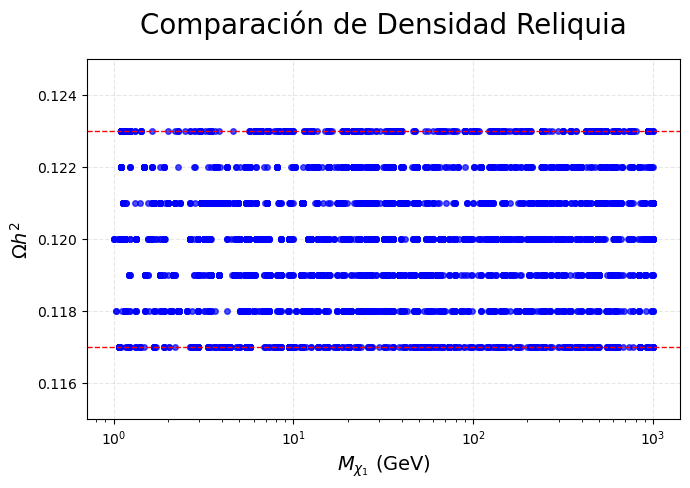

In [7]:
# Configuración de la figura
plt.figure(figsize=(7, 5))  # Ancho mayor para 3 gráficos
plt.title('Comparación de Densidad Reliquia', fontsize=20, y=1.05)

#plt.plot(df_5.column('Mx1'), df_5.column('Densidad reliquia'),'.',color='blue',alpha=0.5)
plt.plot(df_omega.column('Mx1'), df_omega.column('Densidad reliquia'), 
         '.', color='blue', alpha=0.7, markersize=8)
plt.axhline(y=val_min, color='red', linestyle='--', linewidth=1)
plt.axhline(y=val_max, color='red', linestyle='--', linewidth=1)
plt.ylabel(r'$\Omega h^2$', fontsize=14)
plt.xlabel(r'$M_{\chi_{1}}$ (GeV)', fontsize=14)
plt.ylim(0.115, 0.125)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xscale('log')
plt.yscale('linear')


plt.tight_layout()
plt.show()

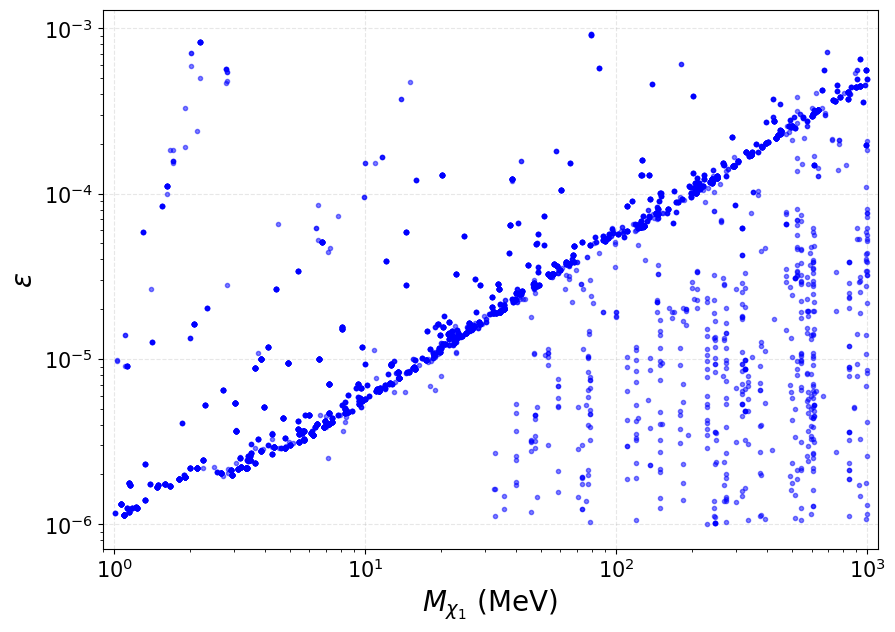

In [8]:
plt.figure(figsize=(10,7))
plt.plot(df_omega.column('Mx1'), df_omega.column('epsilon') ,'.',color='blue',alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=12, framealpha=0.9, loc='best')
#plt.title(r'$\Delta \geq 2m_{e}$',size=20)
plt.xlim(0.9,1e3+100)
plt.savefig('img_scan1_1529.jpg')
plt.show()

In [9]:
dfa = df_omega.where('delta', are.above_or_equal_to(1))
dfb = df_omega.where('delta', are.below(1))